# CODSOFT DATA SCIENCE TASK 5 (CREDIT CARD FRAUD DETECTION)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix , roc_curve , auc
from imblearn.over_sampling import SMOTE

## Locate our file path

In [2]:
card = pd.read_csv("D:\CODSOFT\creditcard.csv")
card

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [3]:
card.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Visualizing the data for class distribution

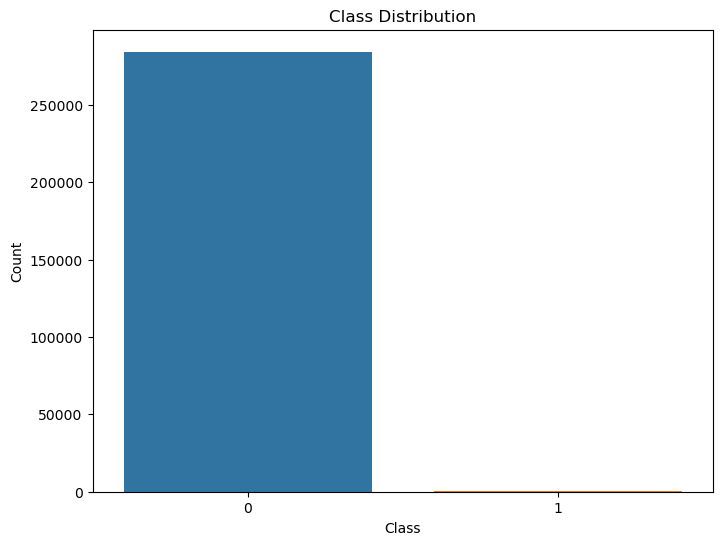

In [4]:
# Ignoring Future Warning : Pass the following variable as a keyword arg: x. 
# From version 0.12, the only valid positional argument will be `data`, 
# and passing other arguments without an explicit keyword will result in an error or misinterpretation.
import warnings
warnings.simplefilter(action="ignore" , category=FutureWarning)

plt.figure(figsize=(8,6))
sns.countplot(card['Class'])
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

## Now Splitting , Preprocessing and Normalizing the dataset 

In [5]:
x=card.drop('Class',axis=1)
y=card['Class']

In [6]:
scaler = StandardScaler()
x_normalized = scaler.fit_transform(x)

In [7]:
x_train , x_test , y_train , y_test = train_test_split(x_normalized,y,test_size=0.2,random_state=42)

In [8]:
x_train

array([[ 1.02211246,  0.99813578, -0.23059493, ...,  0.11190459,
        -0.14282722, -0.31328851],
       [ 0.47083707, -0.20471578, -0.37966488, ..., -0.91783857,
        -0.43865278, -0.16971724],
       [ 1.15294534,  0.03701909,  0.49691929, ...,  0.51134443,
         0.21293989, -0.30529234],
       ...,
       [-0.316266  , -0.07485041,  0.6013097 , ..., -0.30012303,
        -0.59438237, -0.33747693],
       [-0.14493873, -1.50541154,  1.42605292, ...,  1.23110251,
         1.01738639, -0.34923131],
       [-0.38815775,  0.62959062, -0.47529086, ...,  0.00301407,
         0.11690371,  0.09855435]])

In [9]:
x_test

array([[-1.1225739 , -8.43752029,  5.19889921, ..., -5.00103143,
        -3.15922106,  1.10283362],
       [-1.06453826,  0.17348925, -1.66156107, ...,  0.10156733,
         0.30912807,  1.7262552 ],
       [-1.24936366,  0.71455339, -0.35771771, ...,  0.02826498,
         0.01403934, -0.22928872],
       ...,
       [ 1.00398159,  0.02064719, -0.06645456, ...,  0.88656231,
         1.0736081 , -0.322724  ],
       [-0.75085943, -0.25274392,  0.60042241, ...,  0.10041135,
        -0.8172966 , -0.33887626],
       [-0.96760864, -0.81201403,  0.60098834, ...,  0.31154597,
        -1.83961637,  3.27027611]])

In [10]:
x_normalized

array([[-1.99658302, -0.69424232, -0.04407492, ...,  0.33089162,
        -0.06378115,  0.24496426],
       [-1.99658302,  0.60849633,  0.16117592, ..., -0.02225568,
         0.04460752, -0.34247454],
       [-1.99656197, -0.69350046, -0.81157783, ..., -0.13713686,
        -0.18102083,  1.16068593],
       ...,
       [ 1.6419735 ,  0.98002374, -0.18243372, ...,  0.01103672,
        -0.0804672 , -0.0818393 ],
       [ 1.6419735 , -0.12275539,  0.32125034, ...,  0.26960398,
         0.31668678, -0.31324853],
       [ 1.64205773, -0.27233093, -0.11489898, ..., -0.00598394,
         0.04134999,  0.51435531]])

In [11]:
y_train

223361    0
165061    0
238186    0
150562    0
138452    0
         ..
119879    0
259178    0
131932    0
146867    0
121958    0
Name: Class, Length: 227845, dtype: int64

In [12]:
y_test

43428     1
49906     0
29474     0
276481    0
278846    0
         ..
75723     0
252263    0
221246    0
81910     0
59490     0
Name: Class, Length: 56962, dtype: int64

## Handeling class Imbalance (if any) with SMOTE

In [13]:
smote = SMOTE(random_state=42)
x_resampled , y_resampled = smote.fit_resample(x_train , y_train)

In [14]:
x_resampled

array([[ 1.02211246,  0.99813578, -0.23059493, ...,  0.11190459,
        -0.14282722, -0.31328851],
       [ 0.47083707, -0.20471578, -0.37966488, ..., -0.91783857,
        -0.43865278, -0.16971724],
       [ 1.15294534,  0.03701909,  0.49691929, ...,  0.51134443,
         0.21293989, -0.30529234],
       ...,
       [-0.12535493,  0.41462407,  1.97269902, ...,  1.258051  ,
         1.07769201, -0.35212382],
       [-0.65925342, -0.61334383,  1.24073831, ...,  0.60592019,
        -0.04619151, -0.33606043],
       [-1.38811893,  0.56785896,  0.34705213, ...,  0.04326367,
         0.16953756, -0.16939919]])

In [15]:
y_resampled

0         0
1         0
2         0
3         0
4         0
         ..
454897    1
454898    1
454899    1
454900    1
454901    1
Name: Class, Length: 454902, dtype: int64

## Now we will train the Logistic Regression Model and make prediction

In [16]:
model = LogisticRegression()
model.fit(x_resampled , y_resampled)

LogisticRegression()

In [17]:
y_pred=model.predict(x_test)

In [18]:
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

## Confusion Matrix

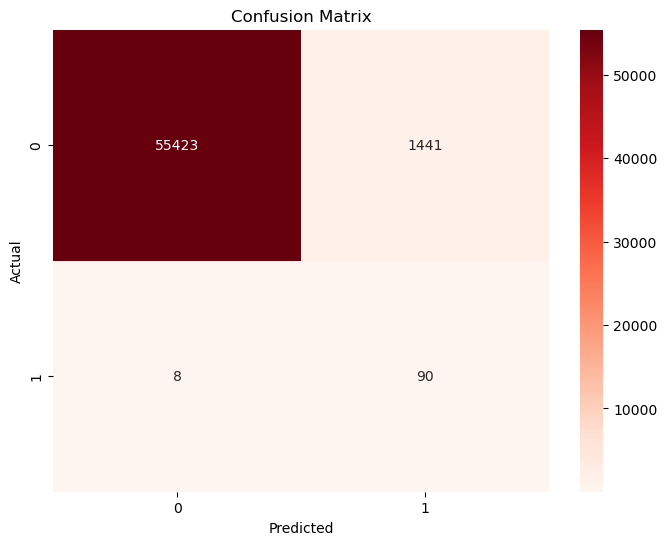

In [19]:
confu_matrix = confusion_matrix(y_test ,y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(confu_matrix , annot=True , fmt ='d',cmap='Reds')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Now making ROC curve

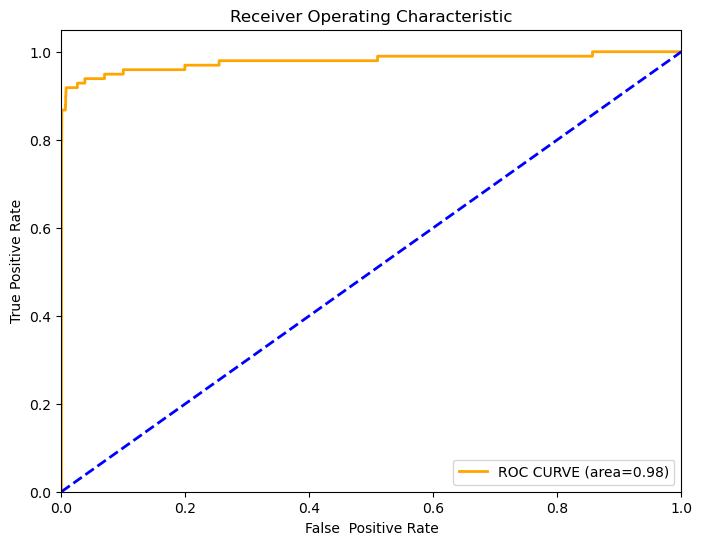

In [20]:
y_pred_prob = model.predict_proba(x_test)[:,1]
fpr ,tpr , _ = roc_curve(y_test , y_pred_prob)
roc_auc = auc(fpr,tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr,tpr,color="orange",lw=2,label='ROC CURVE (area=%0.2f)'% roc_auc)
plt.plot([0,1],[0,1],color="blue" , lw=2,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel("False  Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

## Classification Report

In [21]:
report = classification_report(y_test , y_pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962

